<a href="https://colab.research.google.com/github/isaacyeSN/SS2021/blob/main/Day2PM/SS21_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction with sequential data**

### **1) Long Short Time Memory Model**

# 0. Important necessary modules

In [1]:
import torch 
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1.Data Preparation

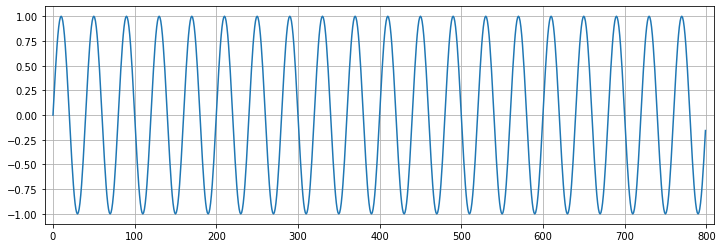

In [2]:
x = torch.linspace(0,799, 800)
y = torch.sin(x * 2 * np.pi / 40)

plt.figure(figsize = (12,4))
plt.xlim(-10, 810)
plt.grid(True)
plt.plot(y.numpy() )

In [ ]:
test_size = 40
train_set = 
test_set = 

### Inspecting dataset

In [ ]:
plt.figure(figsize = (12,4))
plt.xlim(-10, 810)
plt.grid(True)
plt.plot(x[:-test_size].numpy(), y[:-test_size].numpy())
plt.plot(x[-test_size:].numpy(), y[-test_size:].numpy(), 'ro')

# 2. Model Define

### **Data window**

In [ ]:
def input_data(seq, ws):
  output = []   

  return output

In [ ]:
window_size = 40
train_data = input_data(train_set, window_size)

length of input training: 760
719


In [ ]:
plt.stem(train_data[0][0])

### **LSTM Model**

In [ ]:
# LSTM


# 3. Simulation Define

In [ ]:
model = LongShortTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
print(model)

LongShortTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
epochs = 20
future = 40
for i in range(epochs):
  for seq, y_train in train_data:
    optimizer.zero_grad()
    model.hidden = (torch.zeros(1,1,model.hidden_size) ,
                    torch.zeros(1,1,model.hidden_size))
    
    y_pred = model(seq)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
 
  print(f"Epoch {i} Loss {loss.item()} ")
  
  preds = train_set[-window_size:].tolist()
  for f in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
      model.hidden = (torch.zeros(1,1,model.hidden_size) ,
                      torch.zeros(1,1,model.hidden_size))
      preds.append(model(seq).item())
 
  loss = criterion(torch.tensor(preds[-window_size :]), y[760:] )
  print(f'Performance on test range: {loss}')

Epoch 0 Loss 0.07313217222690582 
Performance on test range: 0.5742892622947693
Epoch 1 Loss 0.03941589593887329 
Performance on test range: 0.5034003853797913


In [ ]:
plt.figure(figsize=(12,4))
plt.xlim(700, 801)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(760,800), preds[window_size:])
plt.show()